In [191]:
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM
from keras.datasets import imdb
import numpy as np

df = pd.read_csv('Results3.csv', encoding = 'utf-8')
df.dropna(inplace=True)

C:\Users\lohit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [192]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.callbacks import EarlyStopping
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column.  
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)
    
    
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_ 


def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [198]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
df = df.head(50000)
from keras import regularizers
%matplotlib inline
from matplotlib.pyplot import figure, show
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import csv

In [194]:
df.dtypes
df2 = df.drop(['State','FacilityName','FacilityID','UnitID','GDate','GOwner','UtilityID','GeneratorID','UtilityName','GYear'], 1)
print(df2.dtypes)

encode_text_index(df2, 'UnitTechnologyType')
encode_text_index(df2,'FuelType')
df2.dtypes

ElectricityGeneration    float64
UnitTechnologyType        object
FuelType                  object
NameplateCapacityMW      float64
NameplatePowerFactor     float64
SummerCapacityMW         float64
WinterCapacityMW         float64
dtype: object


ElectricityGeneration    float64
UnitTechnologyType         int64
FuelType                   int64
NameplateCapacityMW      float64
NameplatePowerFactor     float64
SummerCapacityMW         float64
WinterCapacityMW         float64
dtype: object

In [195]:

df2['UnitTechnologyType'] = df2['UnitTechnologyType'].astype(float)
df2['FuelType'] = df2['FuelType'].astype(float)

x,y = to_xy(df2,'ElectricityGeneration')

(40000, 6) (10000, 6)
(40000, 1) (10000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 50)                350       
_________________________________________________________________
dense_69 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 11        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
2s - loss: 23515716.4277
Epoch 2/100
1s - loss: 19678428.5094
Epoch 3/100
1s - loss: 13820240.8475
Epoch 4/100
1s - loss: 12119844.7350
Epoch 5/100
1s - loss: 11776055.1077
Epoch 6/100
1s - loss: 11535837.3544
E

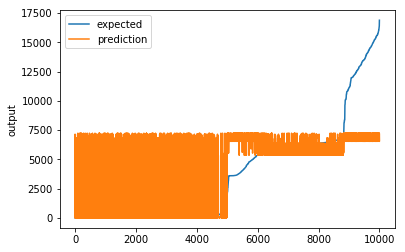

In [202]:

#neural network using L1 and L2 regulurlization 

from keras.callbacks import ModelCheckpoint

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)



model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01),activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print(model.summary())
model.fit(x,y,verbose=2,epochs=100)

#model.load_weights('best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test)

(40000, 6) (10000, 6)
(40000, 1) (10000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 50)                350       
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_74 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 11        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
3s - loss: 23036489.7056
Epoch 2/100
3s - loss: 19355338.5261
Epoch 3/100
3s - 

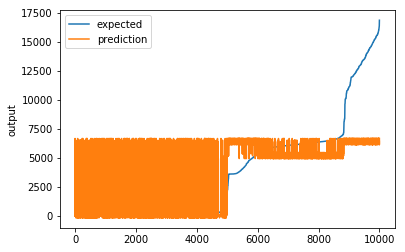

In [203]:

#neural network using dropout regulizaring 

from keras.callbacks import ModelCheckpoint

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)



model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.01))
model.add(Dense(25, activation='relu')) # Hidden 2
#model.add(Dense(10, kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01),activation='relu'))
model.add(Dense(10,activation = 'relu')) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print(model.summary())
model.fit(x,y,verbose=2,epochs=100)

#model.load_weights('best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test)

(40000, 6) (10000, 6)
(40000, 1) (10000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 50)                350       
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_78 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 11        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6s - loss: 22983030.4650
Epoch 2/100
4s - loss: 18927794.1466
Epoch 3/100
4s - 

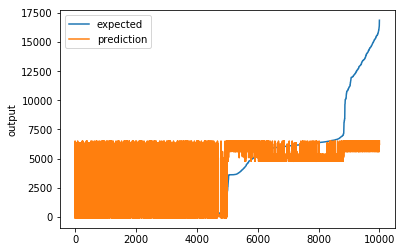

In [204]:

#neural network using L1, L2 and dropout regulizaring 

from keras.callbacks import ModelCheckpoint

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)



model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dropout(0.01))
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01),activation='relu'))
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print(model.summary())
model.fit(x,y,verbose=2,epochs=100)

#model.load_weights('best_weights.hdf5') # load weights from best model

# Predict and measure RMSE
pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Score (RMSE): {}".format(score))

# Plot the chart
chart_regression(pred.flatten(),y_test)

In [205]:
# Kfold validation with dropout,L1 and L2 
kf = KFold(5)
    
oos_y = []
oos_pred = []
fold = 0
for train, test in kf.split(x):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    model = Sequential()
    model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01),activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=0,epochs=200)
    pred = model.predict(x_test)
    oos_y.append(y_test)
    oos_pred.append(pred)        

    # Measure this fold's RMSE
    score = np.sqrt(metrics.mean_squared_error(pred,y_test))
    print("Fold score (RMSE): {}".format(score))


# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_pred,oos_y))
print("Final, out of sample score (RMSE): {}".format(score))    
    
# Write the cross-validated prediction
#os_y = pd.DataFrame(oos_y)
#os_pred = pd.DataFrame(oos_pred)
#osDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#osDF.to_csv('filename_write',index=False)

Fold #1
Epoch 00036: early stopping
Fold score (RMSE): 207.8376007080078
Fold #2
Epoch 00034: early stopping
Fold score (RMSE): 1262.173095703125
Fold #3
Epoch 00012: early stopping
Fold score (RMSE): 5247.8349609375
Fold #4
Epoch 00018: early stopping
Fold score (RMSE): 5451.912109375
Fold #5
Epoch 00035: early stopping
Fold score (RMSE): 2165.05078125
Final, out of sample score (RMSE): 3566.141845703125
